In [2]:
from numpy import *

In [7]:
class LinearRegression:
    def __init__(self, x, y):
      self.x = x
      self.y = y
      self.__correlation_coefficient  = self.__correlacao()
      self.__inclination              = self.__inclinacao()
      self.__intercept                = self.__interceptacao()

    def __correlacao(self):
      covariacao    = cov(self.x, self.y, bias=True)[0][1]
      variancia_x   = var(self.x)
      variancia_y   = var(self.y)

      return covariacao / sqrt(variancia_x * variancia_y)

    def __inclinacao(self):
      stdx = std(self.x)
      stdy = std(self.y)

      return self.__correlation_coefficient * (stdy / stdx)

    def __interceptacao(self):
      mediax = mean(self.x)
      mediay = mean(self.y)

      return mediay - mediax * self.__inclination

    def previsao(self, valor):
      return self.__intercept + (self.__inclination * valor)


In [8]:
x = array([1,2,3,4,5])
y = array([2,4,6,8,10])

lr        = LinearRegression(x, y)
previsao  = lr.previsao(6)
print(previsao)

12.0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [11]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [12]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
base.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [14]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [15]:
base = base.drop(['Unnamed: 0'], axis=1)

In [16]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

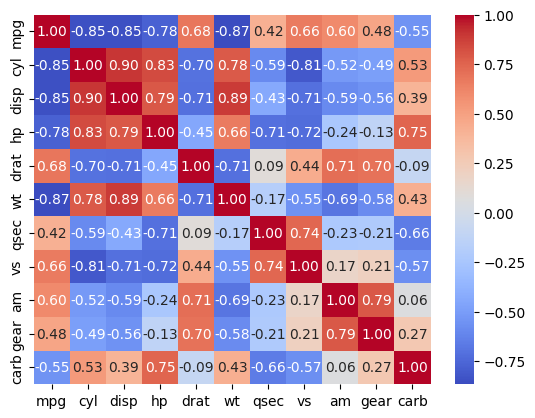

In [19]:
corr = base.corr()
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt='.2f')

<Axes: >

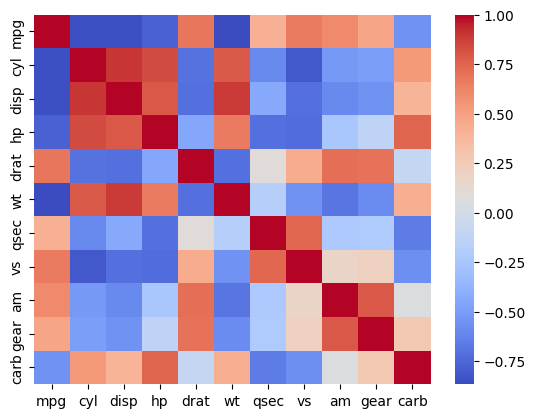

In [20]:
corr = base.corr()
sns.heatmap(corr,cmap='coolwarm', annot=False, fmt='.2f')

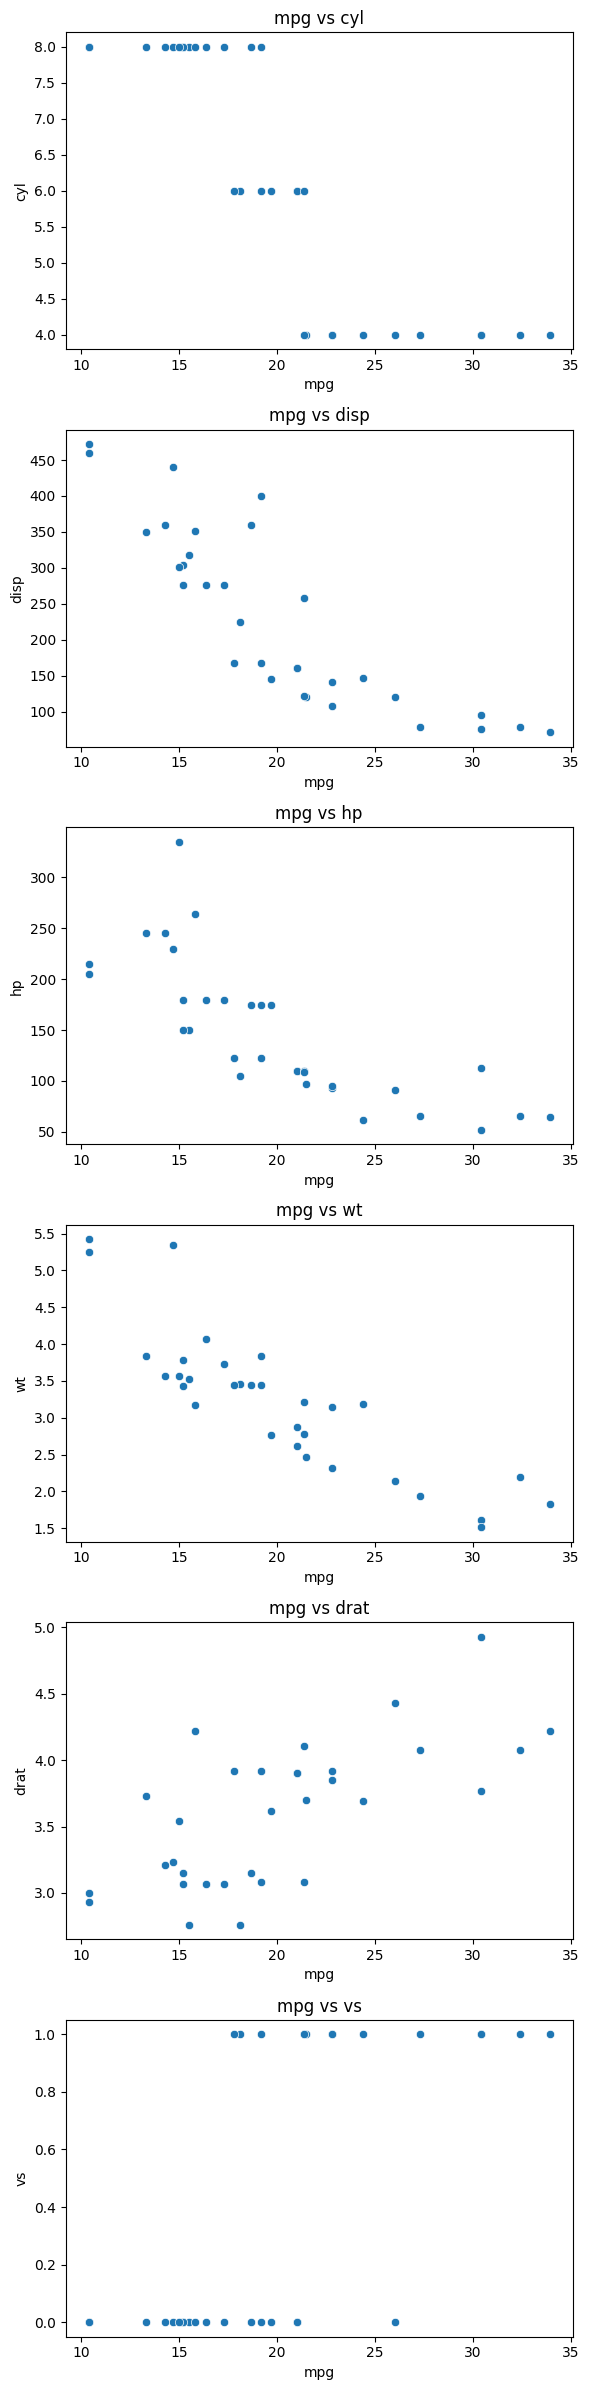

In [21]:
column_pairs  = [('mpg','cyl'),('mpg','disp'),('mpg','hp'),('mpg','wt'),('mpg','drat'),('mpg','vs')]
n_plots       = len(column_pairs)
fig, axes     = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
  x_col, y_col = pair
  sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
  axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [33]:
# aic 156.6 bic 162.5
# modelo = sm.ols(formula='mpg ~wt + disp + hp, data=base)

modelo = sm.ols(formula='mpg ~wt + disp + hp', data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           8.65e-11
Time:                        14:13:54   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
residuos = modelo.resid
print(residuos)

0    -2.570030
1    -1.600803
2    -2.488683
3     0.183327
4     0.459278
5    -2.372159
6    -1.265648
7     1.488501
8     0.759103
9    -0.841143
10   -2.241143
11    0.630726
12    0.238423
13   -1.671533
14    0.078531
15    1.040208
16    5.488546
17    5.786529
18    1.124005
19    5.860926
20   -3.101590
21   -3.254919
22   -3.891113
23   -1.248777
24    2.536119
25   -0.320426
26   -0.023631
27    2.655042
28   -0.702463
29   -1.288776
30    2.183158
31   -1.629587
dtype: float64


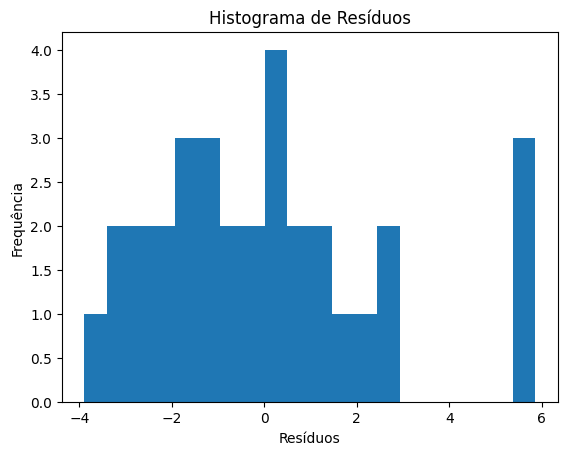

In [35]:
plt.hist(residuos, bins=20)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma de Resíduos")
plt.show()

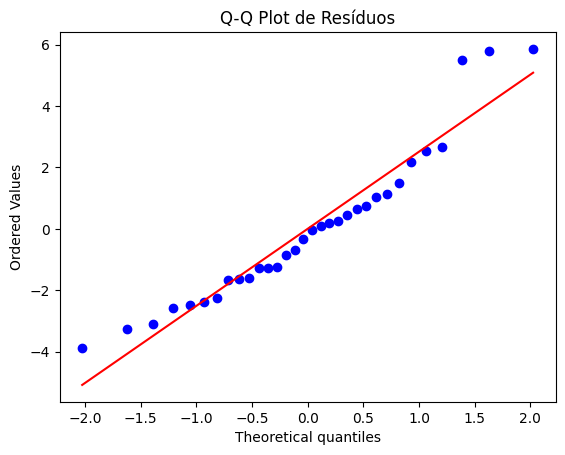

In [36]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de Resíduos")
plt.show()

In [37]:
# h0: os dados estão normalmente distribuídos
# p <= 0.05 rejeito a hipótese nula, (não estão normalmente distribuídos)
# p > 0.05 não é possível rejeitar a h0

import scipy.stats as stats

stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk estatística: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk estatística: 0.927, p-value: 0.033


In [39]:
# aic 156.6 bic 162.5
# modelo = sm.ols(formula='mpg ~wt + disp + hp, data=base)
# aic 165.1 bic 169.5

modelo = sm.ols(formula='mpg ~ disp + cyl', data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.06e-09
Time:                        14:26:19   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
residuos = modelo.resid
print(residuos)

0    -0.843953
1    -0.843953
2    -3.288855
3     1.573244
4     4.147328
5    -2.406016
6    -0.252672
7    -0.892268
8    -2.613712
9    -2.487517
10   -3.887517
11    0.114186
12    1.014186
13   -1.085814
14   -1.847305
15   -2.094309
16    1.794018
17    5.708044
18    3.646294
19    7.051609
20   -4.339793
21    0.082815
22   -0.505356
23   -1.458509
24    5.470673
25    0.614220
26    0.164324
27    4.045616
28    1.062075
29   -2.452707
30   -0.767107
31   -4.421268
dtype: float64


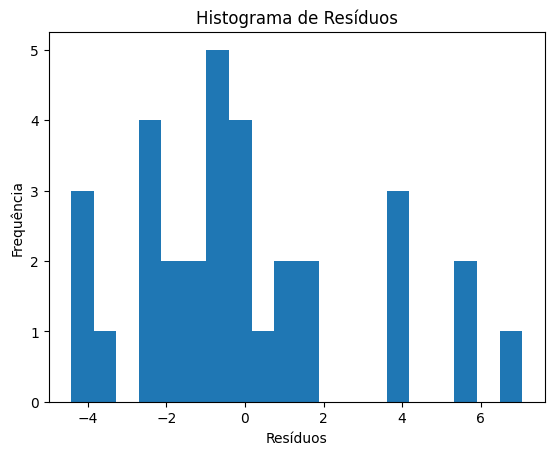

In [42]:
plt.hist(residuos, bins=20)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma de Resíduos")
plt.show()

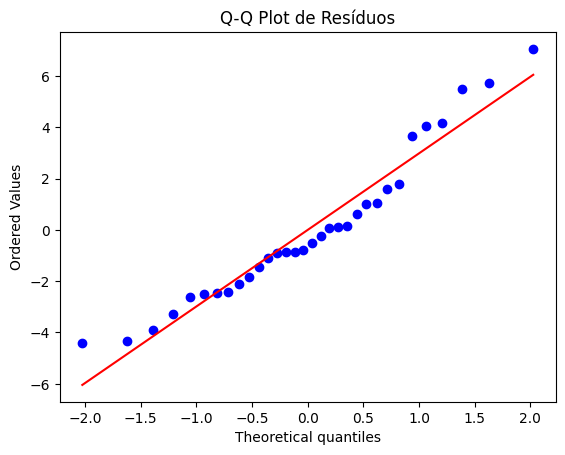

In [44]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de Resíduos")
plt.show()

In [45]:
# h0: os dados estão normalmente distribuídos
# p <= 0.05 rejeito a hipótese nula, (não estão normalmente distribuídos)
# p > 0.05 não é possível rejeitar a h0

import scipy.stats as stats

stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk estatística: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk estatística: 0.942, p-value: 0.085
